In [ ]:
# Import required libraries
import pandas as pd
import statsmodels.api as sm

In [ ]:
# Load the data
df = pd.read_csv('/content/Regression.csv')

In [ ]:
df

,Year,Economic growth,Debt to GDP,Total Central Transfers,Capital expendityre
0,2000,5.05,28.11,2201.51,618.00
1,2001,7.25,29.58,2589.59,718.00
2,2002,11.51,30.87,2653.59,949.00
3,2003,11.28,32.21,2919.62,1932.00
4,2004,14.02,31.47,4619.64,878.00
5,2005,14.02,30.02,4579.13,1104.00
6,2006,14.74,30.02,6424.08,1234.00
7,2007,12.38,29.13,8103.04,1475.00
8,2008,13.89,28.50,9421.07,1696.00
9,2009,15.78,28.00,10834.24,2059.00


In [ ]:
# Keep required columns
df = df[['Year', 'Economic growth', 'Debt to GDP', 'Total Central Transfers','Capital expendityre']]



In [ ]:
# Add lag columns
for i in range(1,3):
    col_name = 'Economic growth_lag_' + str(i)
    df[col_name] = df['Economic growth'].shift(i)

In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Create a DataFrame from your data
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Economic_growth': [5.05, 7.25, 11.51, 11.28, 14.02, 14.02, 14.74, 12.38, 13.89, 15.78, 14.41, 13.7, 18.54, 13.26, 12.79, 10.22, 9.67, 12.97, 10.51, 12.36, 3.13, -5.07, 12.01],
    'Debt_to_GDP': [28.11, 29.58, 30.87, 32.21, 31.47, 30.02, 30.02, 29.13, 28.5, 28, 27.48, 26.84, 25.58, 26.31, 26.68, 27.69, 28.57, 29.89, 30.65, 32.19, 38.57, 39.62, 37.16],
    'Total_Central_Transfers': [2201.51, 2589.59, 2653.59, 2919.62, 4619.64, 4579.13, 6424.08, 8103.04, 9421.07, 10834.24, 7135.62, 9699.58, 9862.18, 14365.21, 15434.28, 21612.02, 23735.37, 25360.92, 30427.13, 27636.31, 42628.52, 47838.02, 57210.21],
    'Capital_expenditure': [618, 718, 949, 1932, 878, 1104, 1234, 1475, 1696, 2059, 3364, 3853, 4588, 8635.03, 4997.68, 8342.29, 11286.24, 10289.46, 9753.43, 9665.02, 15438.16, 17046.02, 16521.62]
}

df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
X = df.drop(['Year', 'Economic_growth'], axis=1)
y = df['Economic_growth']

# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for infinite values
infinite_values = np.isfinite(X).all()
print("\nInfinite Values:")
print(infinite_values)

# Handle missing values (replace with mean, median, or impute)
X.fillna(X.mean(), inplace=True)

# Handle infinite values (replace with a large finite value or impute)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Build and fit OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


Missing Values:
Debt_to_GDP                0
Total_Central_Transfers    0
Capital_expenditure        0
dtype: int64

Infinite Values:
Debt_to_GDP                True
Total_Central_Transfers    True
Capital_expenditure        True
dtype: bool
                            OLS Regression Results                            
Dep. Variable:        Economic_growth   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     7.587
Date:                Tue, 30 Jan 2024   Prob (F-statistic):            0.00156
Time:                        12:30:37   Log-Likelihood:                -59.604
No. Observations:                  23   AIC:                             127.2
Df Residuals:                      19   BIC:                             131.8
Df Model:                           3                                         
Covariance Type:            nonrobust          

In [ ]:
import numpy as np
import statsmodels.api as sm

# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for infinite values
infinite_values = np.isfinite(X).all()
print("\nInfinite Values:")
print(infinite_values)

# Handle missing values (replace with mean, median, or impute)
X.fillna(X.mean(), inplace=True)

# Handle infinite values (replace with a large finite value)
large_finite_value = 1e12  # Adjust the value based on your dataset
X.replace([np.inf, -np.inf], large_finite_value, inplace=True)

# Verify that missing and infinite values are handled
print("\nAfter Handling:")
print("Missing Values:")
print(X.isnull().sum())
print("\nInfinite Values:")
print(np.isfinite(X).all())

# Build and fit AR model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()


Missing Values:
const                      0
Debt_to_GDP                0
Total_Central_Transfers    0
Capital_expenditure        0
dtype: int64

Infinite Values:
const                      True
Debt_to_GDP                True
Total_Central_Transfers    True
Capital_expenditure        True
dtype: bool

After Handling:
Missing Values:
const                      0
Debt_to_GDP                0
Total_Central_Transfers    0
Capital_expenditure        0
dtype: int64

Infinite Values:
const                      True
Debt_to_GDP                True
Total_Central_Transfers    True
Capital_expenditure        True
dtype: bool


In [ ]:
# Add lag columns
for i in range(1,3):
    col_name = 'Economic growth_lag_' + str(i)
    df[col_name] = df['Economic growth'].shift(i)


In [ ]:
print(df.columns)


Index(['Year', 'Economic_growth', 'Debt_to_GDP', 'Total_Central_Transfers',
       'Capital_expenditure'],
      dtype='object')


In [ ]:
df.drop(['Economic_growth'], axis=1, inplace=True)


In [ ]:
X.fillna(X.mean(), inplace=True)


In [ ]:
w# Build and fit AR model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Economic_growth   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     7.587
Date:                Tue, 30 Jan 2024   Prob (F-statistic):            0.00156
Time:                        12:37:54   Log-Likelihood:                -59.604
No. Observations:                  23   AIC:                             127.2
Df Residuals:                      19   BIC:                             131.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

                               SARIMAX Results                                
Dep. Variable:        Economic growth   No. Observations:                   23
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -63.746
Date:                Sun, 28 Jan 2024   AIC                            137.491
Time:                        16:47:21   BIC                            142.946
Sample:                             0   HQIC                           138.776
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5491      0.945     -0.581      0.561      -2.402       1.303
ar.L2         -0.3626      0.888     -0.408      0.683      -2.103       1.378
ma.L1          0.2018      0.838      0.241      0.8

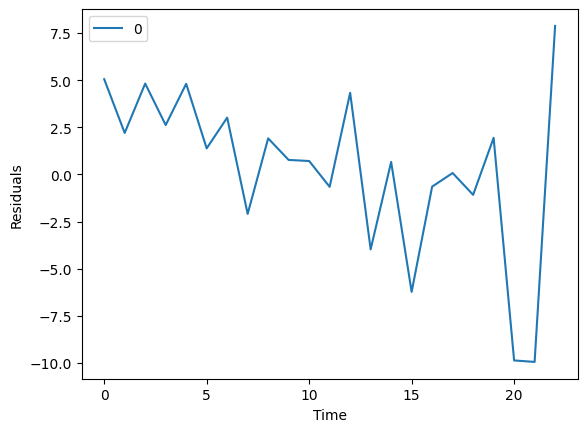

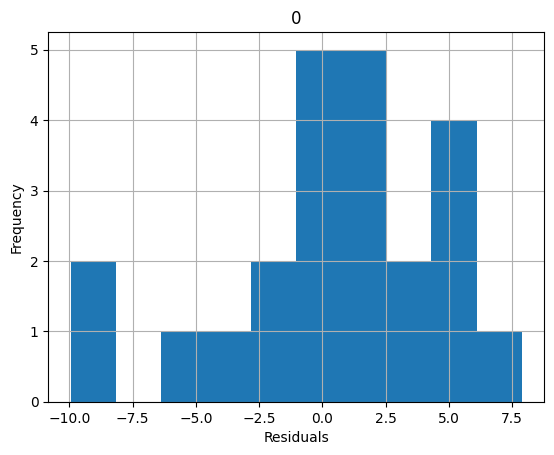

0      0.000000
1      5.049963
2      6.691509
3      8.661243
4      9.215886
5     12.638119
6     11.728346
7     14.474096
8     11.977848
9     15.012305
10    13.698875
11    14.358837
12    14.211622
13    17.237424
14    12.127304
15    16.451238
16    10.318642
17    12.895647
18    11.593462
19    10.420127
20    12.996730
21     4.875584
22     4.133794
Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load data
df = pd.read_csv('/content/Regression.csv')
y = df['Economic growth']

# Fit ARIMA model
model = ARIMA(y, order=(2,1,2))
model_fit = model.fit()

# Summary of fit model
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Plot residual errors histogram
residuals.hist()
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Predictions
predictions = model_fit.predict()
print(predictions)

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Load data
df = pd.read_csv('/content/Regression.csv')

# Check and handle stationarity if needed
for col in df.columns[1:]:
    result = adfuller(df[col])
    if result[1] > 0.05:  # If p-value is greater than 0.05, indicating non-stationarity
        df[col] = df[col].diff()  # Difference the non-stationary series

# Drop NaN resulting from differencing
df = df.dropna()

# Create VAR model
model = VAR(df[['Economic growth', 'Debt to GDP', 'Total Central Transfers', 'Capital expendityre']])

# Select a smaller lag order manually
lag_order = 2  # You can adjust this value based on your data and needs

# Fit VAR model with the selected lag order
results = model.fit(lag_order)

# Summary of VAR model
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 02, Feb, 2024
Time:                     13:45:49
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    34.6465
Nobs:                     20.0000    HQIC:                   33.2041
Log likelihood:          -406.057    FPE:                2.44891e+14
AIC:                      32.8542    Det(Omega_mle):     5.53988e+13
--------------------------------------------------------------------
Results for equation Economic growth
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.471796         1.244839           -0.379           0.705
L1.Economic growth                -0.478492         0.318770           -1.501           0.13

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Create DataFrame from provided data
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Economic_growth': [5.05, 7.25, 11.51, 11.28, 14.02, 14.02, 14.74, 12.38, 13.89, 15.78, 14.41, 13.7, 18.54, 13.26, 12.79, 10.22, 9.67, 12.97, 10.51, 12.36, 3.13, -5.07, 12.01],
    'Debt_to_GDP': [28.11, 29.58, 30.87, 32.21, 31.47, 30.02, 30.02, 29.13, 28.5, 28, 27.48, 26.84, 25.58, 26.31, 26.68, 27.69, 28.57, 29.89, 30.65, 32.19, 38.57, 39.62, 37.16],
    'Total_Central_Transfers': [2201.51, 2589.59, 2653.59, 2919.62, 4619.64, 4579.13, 6424.08, 8103.04, 9421.07, 10834.24, 7135.62, 9699.58, 9862.18, 14365.21, 15434.28, 21612.02, 23735.37, 25360.92, 30427.13, 27636.31, 42628.52, 47838.02, 57210.21],
    'Capital_expenditure': [618, 718, 949, 1932, 878, 1104, 1234, 1475, 1696, 2059, 3364, 3853, 4588, 8635.03, 4997.68, 8342.29, 11286.24, 10289.46, 9753.43, 9665.02, 15438.16, 17046.02, 16521.62]
}

df = pd.DataFrame(data)

# Fit ARIMAX model
endog_variable = df['Economic_growth']
exog_variables = df[['Debt_to_GDP', 'Total_Central_Transfers', 'Capital_expenditure']]
arima_order = (1, 1, 1)

model = sm.tsa.ARIMA(endog_variable, order=arima_order, exog=exog_variables)
results = model.fit()

# Short-term forecast (assuming 1 step into the future)
forecast_steps = 1
forecast = results.get_forecast(steps=forecast_steps, exog=exog_variables.iloc[-forecast_steps:])

# Extract forecast values, standard errors, and confidence intervals
forecast_values = forecast.predicted_mean
stderr = forecast.se_mean
conf_int = forecast.conf_int()

# Print the equation used for prediction
print("Equation used for prediction:")
print(f"Economic_growth(t+1) = {results.params[0]} + {results.params[1]} * Economic_growth(t) + {results.params[2]} * Debt_to_GDP(t+1) + {results.params[3]} * Total_Central_Transfers(t+1) + {results.params[4]} * Capital_expenditure(t+1)")

# Print forecast values
print("\nShort-term Forecast:")
print(forecast_values)

# Print standard errors
print("\nStandard Errors:")
print(stderr)

# Print confidence intervals
print("\nConfidence Intervals:")
print(conf_int)


Equation used for prediction:
Economic_growth(t+1) = -1.3639306155042303 + 0.000384528309375002 * Economic_growth(t) + -0.0009651789539792283 * Debt_to_GDP(t+1) + 0.09266512934971613 * Total_Central_Transfers(t+1) + -0.3841935894620565 * Capital_expenditure(t+1)

Short-term Forecast:
23    9.979322
dtype: float64

Standard Errors:
23    3.331404
dtype: float64

Confidence Intervals:
    lower Economic_growth  upper Economic_growth
23               3.449891              16.508753


In [ ]:
from scipy.stats import yeojohnson
from statsmodels.tsa.stattools import adfuller

# Add a constant shift to make the data strictly positive
shift_constant = abs(df['Economic_growth'].min()) + 1
df['Economic_growth_shifted'] = df['Economic_growth'] + shift_constant

# Apply Yeo-Johnson transformation to the shifted data
df['Economic_growth_yeojohnson'], _ = yeojohnson(df['Economic_growth_shifted'])

# Perform the Augmented Dickey-Fuller test on the transformed series
result_yeojohnson = adfuller(df['Economic_growth_yeojohnson'])

# Extract and print the test statistics for the transformed series
adf_statistic_yeojohnson = result_yeojohnson[0]
p_value_yeojohnson = result_yeojohnson[1]

print(f'ADF Statistic (after Yeo-Johnson transformation): {adf_statistic_yeojohnson}')
print(f'p-value (after Yeo-Johnson transformation): {p_value_yeojohnson}')

# Check the critical values
critical_values_yeojohnson = result_yeojohnson[4]
print('\nCritical Values (after Yeo-Johnson transformation):')
for key, value in critical_values_yeojohnson.items():
    print(f'{key}: {value}')

# Interpret the results
if p_value_yeojohnson <= 0.05:
    print('\nThe Yeo-Johnson transformed data is likely stationary (reject the null hypothesis)')
else:
    print('\nThe Yeo-Johnson transformed data is likely non-stationary (fail to reject the null hypothesis)')



ADF Statistic (after Yeo-Johnson transformation): -2.8718846803796114
p-value (after Yeo-Johnson transformation): 0.04871647276297524

Critical Values (after Yeo-Johnson transformation):
1%: -3.769732625845229
5%: -3.005425537190083
10%: -2.6425009917355373

The Yeo-Johnson transformed data is likely stationary (reject the null hypothesis)


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Assuming df is your DataFrame
# Specify the correct column names for the cointegration test
columns_for_test = ['Economic_growth', 'Debt_to_GDP']

# Perform Johansen cointegration test
result = coint_johansen(df[columns_for_test], det_order=0, k_ar_diff=1)

# Extract test statistics and critical values
trace_statistic, trace_critical_value = result.lr1
max_eig_statistic, max_eig_critical_value = result.lr2

# Check the cointegration rank using the trace statistic
trace_statistic_threshold = trace_critical_value  # Use 1% critical value
cointegration_rank_trace = 1 if trace_statistic > trace_statistic_threshold else 0

# Check the cointegration rank using the maximum eigenvalue statistic
max_eig_statistic_threshold = max_eig_critical_value  # Use 1% critical value
cointegration_rank_max_eig = 1 if max_eig_statistic > max_eig_statistic_threshold else 0

# Print results
print(f"Trace statistic: {trace_statistic}")
print(f"Critical value (1%): {trace_critical_value}")
print(f"Cointegration rank (trace): {cointegration_rank_trace}")

print(f"\nMaximum Eigenvalue statistic: {max_eig_statistic}")
print(f"Critical value (1%): {max_eig_critical_value}")
print(f"Cointegration rank (max eigenvalue): {cointegration_rank_max_eig}")


Trace statistic: 38.85642093474695
Critical value (1%): 1.0221315455856717
Cointegration rank (trace): 1

Maximum Eigenvalue statistic: 37.83428938916128
Critical value (1%): 1.0221315455856717
Cointegration rank (max eigenvalue): 1


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM

# Assuming df is your DataFrame
# Specify the correct column names for the cointegration test
columns_for_cointegration = ['Economic_growth', 'Debt_to_GDP']

# Select the cointegrated variables
cointegrated_data = df[columns_for_cointegration]

# Fit the VECM model
model = VECM(cointegrated_data, k_ar_diff=1, coint_rank=1)  # Use the cointegration rank obtained from the Johansen test
result = model.fit()

# Display the model summary
print(result.summary())

# Get the short-term and long-term coefficients
alpha = result.alpha
beta = result.beta

# Print the coefficients
print(f"\nShort-term coefficients (alpha):\n{alpha}")
print(f"\nLong-term coefficients (beta):\n{beta}")

# Perform impulse response analysis, forecast, etc. as needed
# For example:
# irf = result.irf()
# forecasts = result.predict(steps=your_forecast_steps)


Det. terms outside the coint. relation & lagged endog. parameters for equation Economic_growth
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
L1.Economic_growth    -0.0679      0.217     -0.313      0.754      -0.493       0.357
L1.Debt_to_GDP        -2.9347      0.452     -6.494      0.000      -3.820      -2.049
Det. terms outside the coint. relation & lagged endog. parameters for equation Debt_to_GDP
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
L1.Economic_growth     0.1944      0.116      1.683      0.092      -0.032       0.421
L1.Debt_to_GDP         0.7929      0.241      3.293      0.001       0.321       1.265
          Loading coefficients (alpha) for equation Economic_growth           
                 coef    std err       

In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Assuming df is your DataFrame
# Specify the correct column names for the cointegration test
columns_for_test = ['Economic_growth', 'Total_Central_Transfers']

# Perform Johansen cointegration test
result = coint_johansen(df[columns_for_test], det_order=0, k_ar_diff=1)

# Extract test statistics and critical values
trace_statistic, trace_critical_value = result.lr1
max_eig_statistic, max_eig_critical_value = result.lr2

# Check the cointegration rank using the trace statistic
trace_statistic_threshold = trace_critical_value  # Use 1% critical value
cointegration_rank_trace = 1 if trace_statistic > trace_statistic_threshold else 0

# Check the cointegration rank using the maximum eigenvalue statistic
max_eig_statistic_threshold = max_eig_critical_value  # Use 1% critical value
cointegration_rank_max_eig = 1 if max_eig_statistic > max_eig_statistic_threshold else 0

# Print results
print(f"Trace statistic: {trace_statistic}")
print(f"Critical value (1%): {trace_critical_value}")
print(f"Cointegration rank (trace): {cointegration_rank_trace}")

print(f"\nMaximum Eigenvalue statistic: {max_eig_statistic}")
print(f"Critical value (1%): {max_eig_critical_value}")
print(f"Cointegration rank (max eigenvalue): {cointegration_rank_max_eig}")


Trace statistic: 32.603824079074734
Critical value (1%): 7.987766244124311
Cointegration rank (trace): 1

Maximum Eigenvalue statistic: 24.61605783495042
Critical value (1%): 7.987766244124311
Cointegration rank (max eigenvalue): 1


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM

# Assuming df is your DataFrame
# Specify the correct column names for the cointegration test
columns_for_cointegration = ['Economic_growth', 'Total_Central_Transfers']

# Select the cointegrated variables
cointegrated_data = df[columns_for_cointegration]

# Fit the VECM model
model = VECM(cointegrated_data, k_ar_diff=1, coint_rank=1)  # Use the cointegration rank obtained from the Johansen test
result = model.fit()

# Display the model summary
print(result.summary())

# Get the short-term and long-term coefficients
alpha = result.alpha
beta = result.beta

# Print the coefficients
print(f"\nShort-term coefficients (alpha):\n{alpha}")
print(f"\nLong-term coefficients (beta):\n{beta}")

# Perform impulse response analysis, forecast, etc. as needed
# For example:
# irf = result.irf()
# forecasts = result.predict(steps=your_forecast_steps)


Det. terms outside the coint. relation & lagged endog. parameters for equation Economic_growth
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
L1.Economic_growth            -0.7207      0.392     -1.837      0.066      -1.490       0.048
L1.Total_Central_Transfers    -0.0006      0.000     -1.360      0.174      -0.001       0.000
Det. terms outside the coint. relation & lagged endog. parameters for equation Total_Central_Transfers
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
L1.Economic_growth             9.1299    232.607      0.039      0.969    -446.771     465.030
L1.Total_Central_Transfers    -0.6815      0.245     -2.781      0.005      -1.162      -0.201
          Loading coefficients (alpha) for

In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Assuming df is your DataFrame
# Specify the correct column names for the cointegration test
columns_for_test = ['Economic_growth', 'Capital_expenditure']

# Perform Johansen cointegration test
result = coint_johansen(df[columns_for_test], det_order=0, k_ar_diff=1)

# Extract test statistics and critical values
trace_statistic, trace_critical_value = result.lr1
max_eig_statistic, max_eig_critical_value = result.lr2

# Check the cointegration rank using the trace statistic
trace_statistic_threshold = trace_critical_value  # Use 1% critical value
cointegration_rank_trace = 1 if trace_statistic > trace_statistic_threshold else 0

# Check the cointegration rank using the maximum eigenvalue statistic
max_eig_statistic_threshold = max_eig_critical_value  # Use 1% critical value
cointegration_rank_max_eig = 1 if max_eig_statistic > max_eig_statistic_threshold else 0

# Print results
print(f"Trace statistic: {trace_statistic}")
print(f"Critical value (1%): {trace_critical_value}")
print(f"Cointegration rank (trace): {cointegration_rank_trace}")

print(f"\nMaximum Eigenvalue statistic: {max_eig_statistic}")
print(f"Critical value (1%): {max_eig_critical_value}")
print(f"Cointegration rank (max eigenvalue): {cointegration_rank_max_eig}")


Trace statistic: 13.652934869156345
Critical value (1%): 2.0082255987050197
Cointegration rank (trace): 1

Maximum Eigenvalue statistic: 11.644709270451324
Critical value (1%): 2.0082255987050197
Cointegration rank (max eigenvalue): 1


In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM

# Assuming df is your DataFrame
# Specify the columns for the VECM model
columns_for_vecm = ['Economic_growth', 'Capital_expenditure']

# Create a VECM model
model = VECM(df[columns_for_vecm], k_ar_diff=1, coint_rank=1)

# Fit the model
result = model.fit()

# Print a summary of the VECM results
print(result.summary())


Det. terms outside the coint. relation & lagged endog. parameters for equation Economic_growth
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
L1.Economic_growth        -0.6798      0.377     -1.803      0.071      -1.419       0.059
L1.Capital_expenditure    -0.0008      0.001     -1.150      0.250      -0.002       0.001
Det. terms outside the coint. relation & lagged endog. parameters for equation Capital_expenditure
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
L1.Economic_growth       243.9985    139.592      1.748      0.080     -29.597     517.594
L1.Capital_expenditure    -0.1659      0.255     -0.649      0.516      -0.667       0.335
          Loading coefficients (alpha) for equation Economic_growth           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9466  , p=0.1023  , df_denom=19, df_num=1
ssr based chi2 test:   chi2=3.4118  , p=0.0647  , df=1
likelihood ratio test: chi2=3.1718  , p=0.0749  , df=1
parameter F test:         F=2.9466  , p=0.1023  , df_denom=19, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4008  , p=0.0588  , df_denom=16, df_num=2
ssr based chi2 test:   chi2=8.9272  , p=0.0115  , df=2
likelihood ratio test: chi2=7.4392  , p=0.0242  , df=2
parameter F test:         F=3.4008  , p=0.0588  , df_denom=16, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2113  , p=0.0585  , df_denom=13, df_num=3
ssr based chi2 test:   chi2=14.8212 , p=0.0020  , df=3
likelihood ratio test: chi2=11.0899 , p=0.0112  , df=3
parameter F test:         F=3.2113  , p=0.0585  , df_denom=13, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4853  , p=0.1108  , df_d

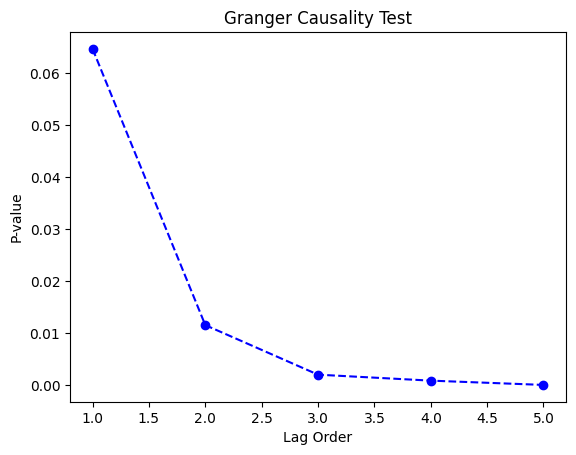

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'df' with the relevant columns
# Example: df = pd.read_csv('your_data.csv')

# Select the columns for the Granger Causality Test
columns_for_test = ['Economic_growth', 'Total_Central_Transfers']

# Specify the maximum lag to be considered in the test
max_lag = 5

# Perform the Granger Causality Test
granger_test_results = grangercausalitytests(df[columns_for_test], max_lag, verbose=True)

# Plot the p-values for each lag
p_values = [granger_test_results[i + 1][0]['ssr_chi2test'][1] for i in range(max_lag)]
lags = range(1, max_lag + 1)

plt.plot(lags, p_values, marker='o', linestyle='--', color='b')
plt.title('Granger Causality Test')
plt.xlabel('Lag Order')
plt.ylabel('P-value')
plt.show()


Impulse Response Functions:

Impulse response for period 1:
[[1. 0.]
 [0. 1.]]

Impulse response for period 2:
[[-0.04484445 -0.10622939]
 [-0.05359791 -0.04605291]]

Impulse response for period 3:
[[-0.12312499  0.04387313]
 [ 0.22928127 -0.14073407]]

Impulse response for period 4:
[[-0.01480192  0.02530479]
 [-0.00606144 -0.01286807]]

Impulse response for period 5:
[[ 0.02526145 -0.01032324]
 [-0.06061732  0.02998772]]

Impulse response for period 6:
[[ 0.00703563 -0.00647356]
 [-0.00098363  0.00676245]]

Impulse response for period 7:
[[-0.00559012  0.00194861]
 [ 0.01434173 -0.00673573]]

Impulse response for period 8:
[[-0.00222695  0.00170647]
 [ 0.00136412 -0.00225152]]

Impulse response for period 9:
[[ 0.00117704 -0.00032276]
 [-0.00332838  0.0014501 ]]

Impulse response for period 10:
[[ 0.00063882 -0.00043987]
 [-0.00061219  0.00066793]]


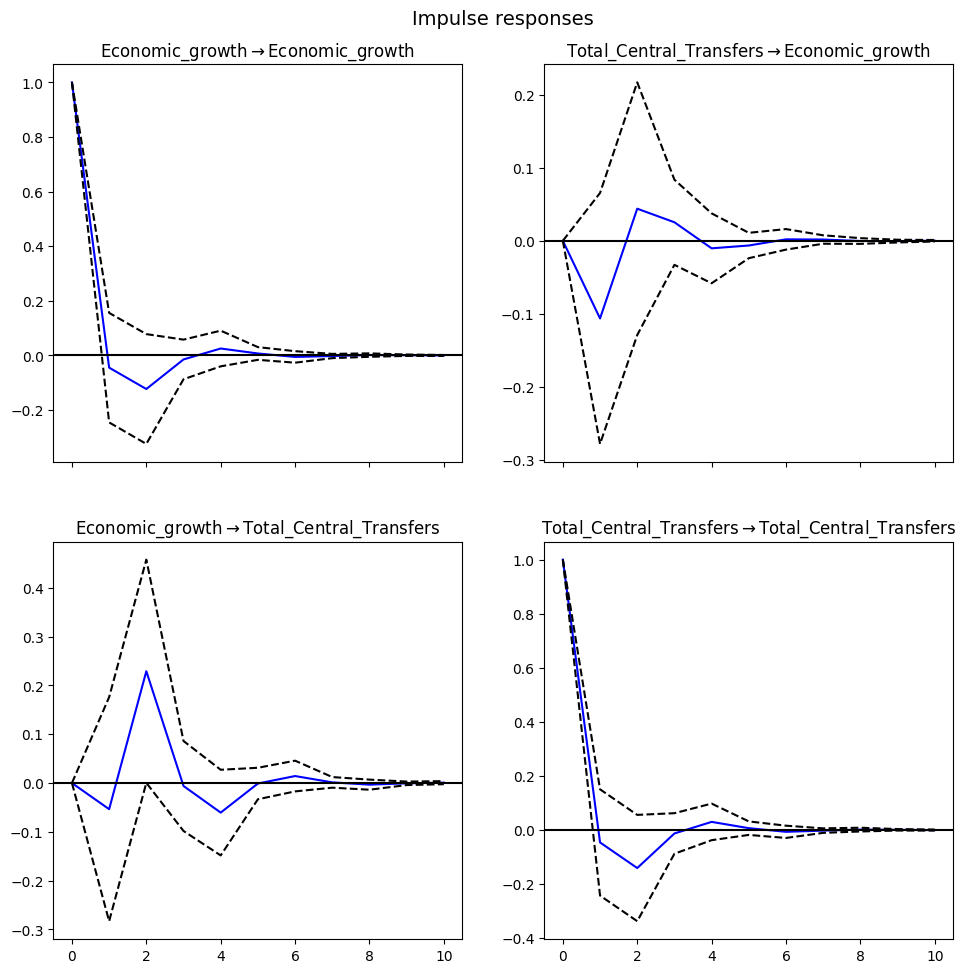

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Simulate some data for illustration purposes
np.random.seed(42)
data_length = 100
data = np.random.randn(data_length, 2)
df = pd.DataFrame(data, columns=['Economic_growth', 'Total_Central_Transfers'])

# Fit VAR model
lag_order = 2  # Corrected variable name
model = VAR(df)
results = model.fit(lag_order)

# Impulse Response Function (IRF) analysis
irf = results.irf(10)  # 10 periods ahead

# Print Impulse Response Functions
print("Impulse Response Functions:")
for period in range(1, 11):
    print(f"\nImpulse response for period {period}:\n{irf.irfs[period-1]}")

# Plot Impulse Response Functions
irf.plot(orth=False)  # Set orth=False for non-orthogonalized IRFs
plt.show()


Impulse Response Functions:

Impulse response for period 1:
[[1. 0.]
 [0. 1.]]

Impulse response for period 2:
[[-0.04484445 -0.10622939]
 [-0.05359791 -0.04605291]]

Impulse response for period 3:
[[-0.12312499  0.04387313]
 [ 0.22928127 -0.14073407]]

Impulse response for period 4:
[[-0.01480192  0.02530479]
 [-0.00606144 -0.01286807]]

Impulse response for period 5:
[[ 0.02526145 -0.01032324]
 [-0.06061732  0.02998772]]

Impulse response for period 6:
[[ 0.00703563 -0.00647356]
 [-0.00098363  0.00676245]]

Impulse response for period 7:
[[-0.00559012  0.00194861]
 [ 0.01434173 -0.00673573]]

Impulse response for period 8:
[[-0.00222695  0.00170647]
 [ 0.00136412 -0.00225152]]

Impulse response for period 9:
[[ 0.00117704 -0.00032276]
 [-0.00332838  0.0014501 ]]

Impulse response for period 10:
[[ 0.00063882 -0.00043987]
 [-0.00061219  0.00066793]]


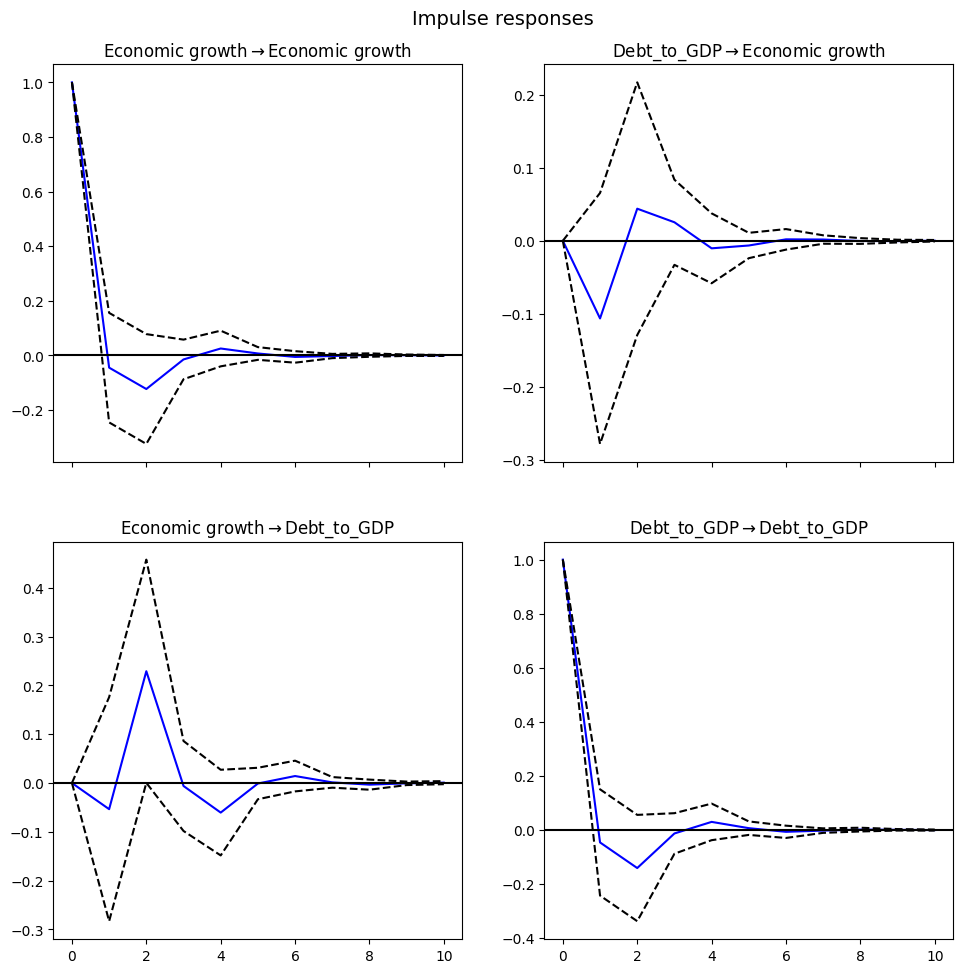

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Simulate some data for illustration purposes
np.random.seed(42)
data_length = 100
data = np.random.randn(data_length, 2)
df = pd.DataFrame(data, columns=['Economic growth', 'Debt_to_GDP'])

# Fit VAR model
lag_order = 2  # Corrected variable name
model = VAR(df)
results = model.fit(lag_order)

# Impulse Response Function (IRF) analysis
irf = results.irf(10)  # 10 periods ahead

# Print Impulse Response Functions
print("Impulse Response Functions:")
for period in range(1, 11):
    print(f"\nImpulse response for period {period}:\n{irf.irfs[period-1]}")

# Plot Impulse Response Functions
irf.plot(orth=False)  # Set orth=False for non-orthogonalized IRFs
plt.show()


Impulse Response Functions:

Impulse response for period 1:
[[1. 0.]
 [0. 1.]]

Impulse response for period 2:
[[-0.04484445 -0.10622939]
 [-0.05359791 -0.04605291]]

Impulse response for period 3:
[[-0.12312499  0.04387313]
 [ 0.22928127 -0.14073407]]

Impulse response for period 4:
[[-0.01480192  0.02530479]
 [-0.00606144 -0.01286807]]

Impulse response for period 5:
[[ 0.02526145 -0.01032324]
 [-0.06061732  0.02998772]]

Impulse response for period 6:
[[ 0.00703563 -0.00647356]
 [-0.00098363  0.00676245]]

Impulse response for period 7:
[[-0.00559012  0.00194861]
 [ 0.01434173 -0.00673573]]

Impulse response for period 8:
[[-0.00222695  0.00170647]
 [ 0.00136412 -0.00225152]]

Impulse response for period 9:
[[ 0.00117704 -0.00032276]
 [-0.00332838  0.0014501 ]]

Impulse response for period 10:
[[ 0.00063882 -0.00043987]
 [-0.00061219  0.00066793]]


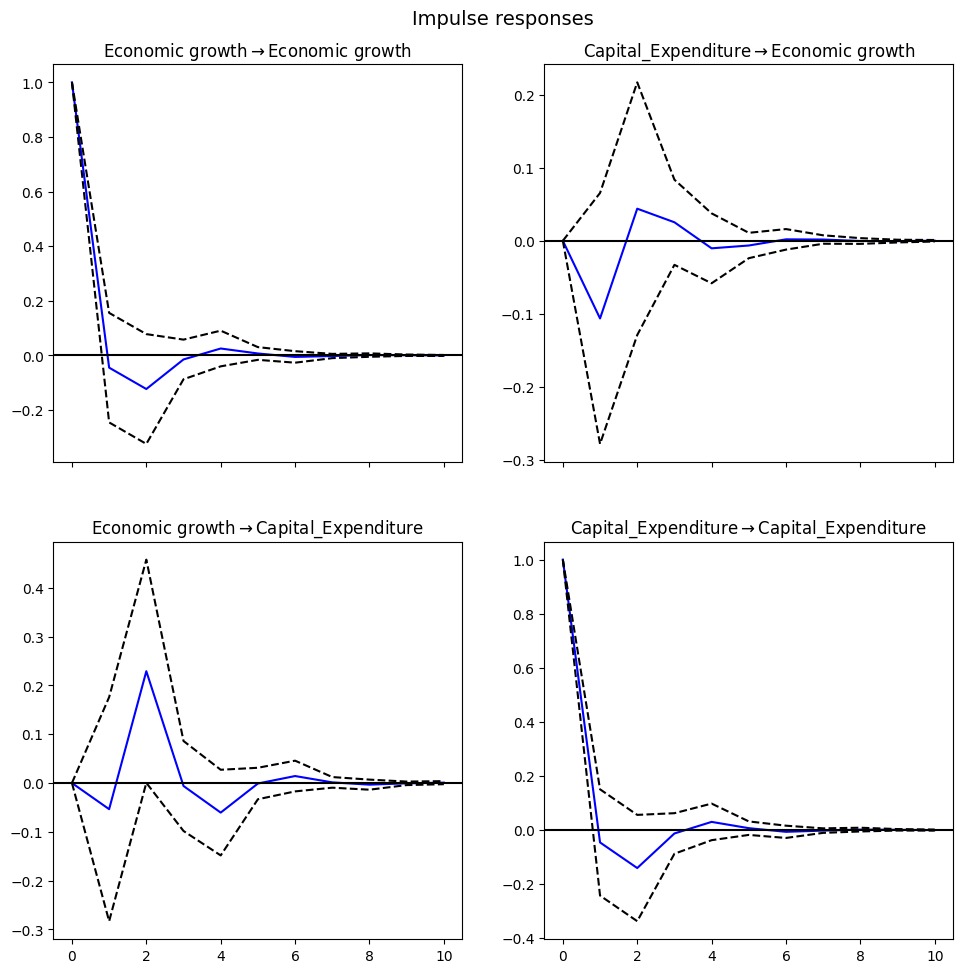

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Simulate some data for illustration purposes
np.random.seed(42)
data_length = 100
data = np.random.randn(data_length, 2)
df = pd.DataFrame(data, columns=['Economic growth', 'Capital_Expenditure'])

# Fit VAR model
lag_order = 2  # Corrected variable name
model = VAR(df)
results = model.fit(lag_order)

# Impulse Response Function (IRF) analysis
irf = results.irf(10)  # 10 periods ahead

# Print Impulse Response Functions
print("Impulse Response Functions:")
for period in range(1, 11):
    print(f"\nImpulse response for period {period}:\n{irf.irfs[period-1]}")

# Plot Impulse Response Functions
irf.plot(orth=False)  # Set orth=False for non-orthogonalized IRFs
plt.show()


In [ ]:
!pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from arch import arch_model

# Read the provided dataset
data = {'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'Economic_growth': [5.05, 7.25, 11.51, 11.28, 14.02, 14.02, 14.74, 12.38, 13.89, 15.78, 14.41, 13.7, 18.54, 13.26, 12.79, 10.22, 9.67, 12.97, 10.51, 12.36, 3.13, -5.07, 12.01],
        'Debt_to_GDP': [28.11, 29.58, 30.87, 32.21, 31.47, 30.02, 30.02, 29.13, 28.5, 28, 27.48, 26.84, 25.58, 26.31, 26.68, 27.69, 28.57, 29.89, 30.65, 32.19, 38.57, 39.62, 37.16],
        'Total_Central_Transfers': [2201.51, 2589.59, 2653.59, 2919.62, 4619.64, 4579.13, 6424.08, 8103.04, 9421.07, 10834.24, 7135.62, 9699.58, 9862.18, 14365.21, 15434.28, 21612.02, 23735.37, 25360.92, 30427.13, 27636.31, 42628.52, 47838.02, 57210.21],
        'Capital_expenditure': [618, 718, 949, 1932, 878, 1104, 1234, 1475, 1696, 2059, 3364, 3853, 4588, 8635.03, 4997.68, 8342.29, 11286.24, 10289.46, 9753.43, 9665.02, 15438.16, 17046.02, 16521.62]}

df = pd.DataFrame(data)

# Calculate the returns of 'Economic_growth'
df['Returns'] = df['Economic_growth'].pct_change() * 100  # Percentage returns

# Drop the first row (NaN due to the percentage change)
df = df.dropna()

# Fit GARCH(1, 1) model
model = arch_model(df['Returns'], vol='Garch', p=1, q=1)
results = model.fit()

# Print GARCH model summary
print(results.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 122.95274164789235
Iteration:      2,   Func. Count:     11,   Neg. LLF: 122.87020437705469
Iteration:      3,   Func. Count:     16,   Neg. LLF: 122.46663319622073
Iteration:      4,   Func. Count:     21,   Neg. LLF: 120.70499553666937
Iteration:      5,   Func. Count:     26,   Neg. LLF: 118.75679778191675
Iteration:      6,   Func. Count:     31,   Neg. LLF: 118.3452812648861
Iteration:      7,   Func. Count:     36,   Neg. LLF: 118.34526692615405
Iteration:      8,   Func. Count:     41,   Neg. LLF: 118.34526208155035
Iteration:      9,   Func. Count:     46,   Neg. LLF: 118.34523303922879
Iteration:     10,   Func. Count:     51,   Neg. LLF: 118.34508207772824
Iteration:     11,   Func. Count:     56,   Neg. LLF: 118.34432089027611
Iteration:     12,   Func. Count:     61,   Neg. LLF: 118.3405052782799
Iteration:     13,   Func. Count:     66,   Neg. LLF: 118.32137693920835
Iteration:     14,   Func. Count:     71,   Neg. LLF: